In [253]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib

In [205]:
df = pd.read_csv("data/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [207]:
df.dropna(subset=['RainToday','RainTomorrow'], inplace= True)

In [208]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           503
Rainfall          679
Evaporation       355
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       545
Pressure3pm       548
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RainTomorrow        2
dtype: int64

In [209]:
px.histogram(df, x = "Location", title = 'Location vs Rainy days', color = 'RainToday')

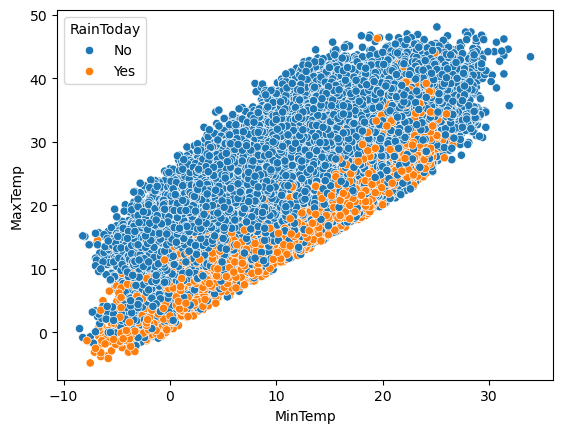

In [210]:
sns.scatterplot(data=df, x = 'MinTemp', y = 'MaxTemp', hue='RainToday')
plt.show()

In [211]:
#Training , validation and test set split
train_val_df, test_df =  train_test_split(df, test_size= 0.2, random_state= 67)
train_df, val_df = train_test_split(train_val_df, test_size= 0.25, random_state= 67)

#For time series data, use time/dates to split the data, so that we use the data of the past to predict for the future and not the other way around

<Axes: xlabel='Date', ylabel='count'>

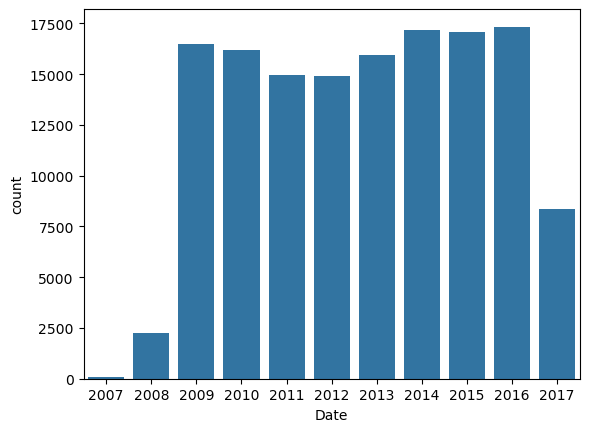

In [212]:
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

In [213]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year<2015]
val_df = df[year == 2015]
test_df = df[ year>2015]

In [214]:
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [215]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [216]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [217]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [218]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [219]:
#For missing data, we cant train ML model on missing data so we gotta impute some values in place of those missing data, we use imputer from sklearn, which has many strategy like fill the NaN with the mean or median or a specific number

imputer = SimpleImputer(strategy='mean')

In [220]:
df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [221]:
imputer.fit(df[numeric_cols])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [222]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [223]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [224]:
#Now we'll scale value to (0,1)
scaler = MinMaxScaler()

In [225]:
scaler.fit(df[numeric_cols])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [226]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [227]:
#Our numerical cols are good for now, lets work on categorical data for now, for ML we need to convert our categorical data into numbers and we can use many ways for this(ex. one-hot encoding)

encoder = OneHotEncoder(sparse_output=False, handle_unknown= 'ignore')

In [228]:
encoder.fit(df[categorical_cols])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [229]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [230]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_12184\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_12184\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_12184\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [231]:
model = LogisticRegression(solver= 'liblinear')

In [232]:
model.fit(train_inputs[numeric_cols+encoded_cols],train_targets)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [233]:
print(model.coef_.tolist())

[[0.8986312677729472, -2.879914573918328, 3.162777798567555, 0.8542468431592446, -1.671393724286513, 6.764401549419656, -0.9423219430958282, -1.4284289005884399, 0.32289250287909144, 5.995315213946081, 5.463857251392878, -9.176804790942521, -0.16229659517757036, 1.287660031157041, 0.47471546184726454, 2.021429600884464, 0.6016501044511503, -0.5524822829180229, 0.47814271383525453, 0.0076698038556416905, 0.3468144974344836, -0.35227710382466865, 0.17971064504167192, 0.4404863674629945, -0.013981813573181305, 0.028943881745188433, 0.2581474181246026, -0.02120542773966032, -0.04279510053184079, -0.48314173282306544, -0.13756324139974502, -0.5760594133388057, -0.7875237280234343, -0.2554041936884929, -0.32888375973550477, -0.5690042381139474, 0.08183003570813245, 0.01338242725210631, 0.06412754242541926, -0.9020545093893246, -0.44432995590025365, 0.008516918909126191, -0.4606123905997727, -0.4655180152537951, -0.06949880400064322, 0.19115882339234913, 0.4504757857803375, 0.6081210891410412

In [234]:
print(model.intercept_)

[-2.44955386]


In [235]:
#Now after training we need to evaluate our model for its accuracy
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols+ encoded_cols]

In [236]:
train_preds = model.predict(X_train)

In [237]:
accuracy_score(train_targets,train_preds)

0.8519206433440829

In [238]:
confusion_matrix(train_targets,train_preds,normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [239]:
def predict_and_plot(inputs, targets, name = ''):
  preds= model.predict(inputs)

  accuracy = accuracy_score(targets,preds)
  print("Accuracy: {:.2f}%".format(accuracy*100))

  cf = confusion_matrix(targets,preds,normalize= 'true')
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{}Confusion Matrix'.format(name))
  
  return preds

Accuracy: 85.40%


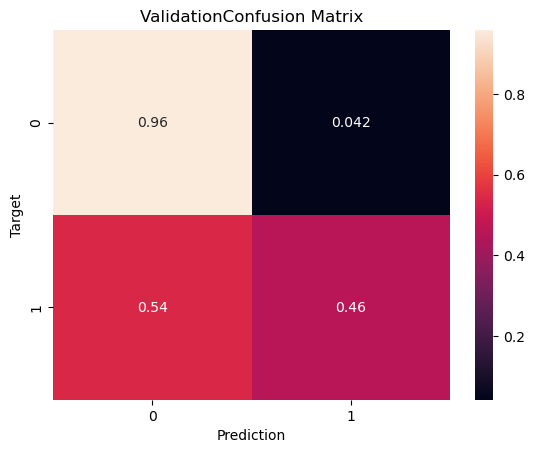

In [240]:
vals_preds = predict_and_plot(X_val,val_targets, 'Validation')

Accuracy: 84.20%


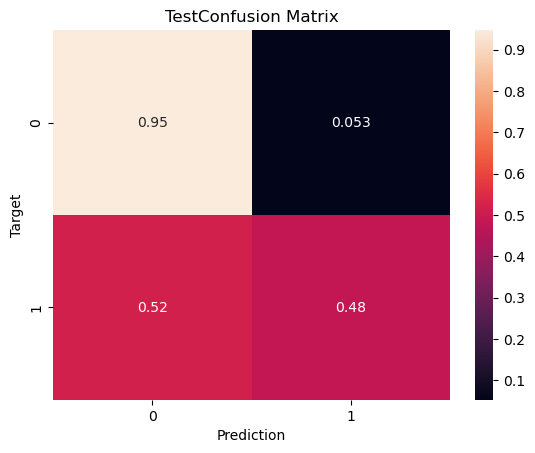

In [241]:
test_preds = predict_and_plot(X_test,test_targets,'Test')

In [242]:
#Testing how good 84% accuracy is in this case
def random_guess(inputs):
  return np.random.choice(['No', 'Yes'], len(inputs))

def all_no(inputs):
  return np.full(len(inputs), "No")

In [243]:
accuracy_score(test_targets, random_guess(X_test))

0.49249319330999614

In [244]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

In [245]:
#Now we'll try to predict some output on a single data point given
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [246]:
new_input_df = pd.DataFrame([new_input])
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,...,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes


In [247]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_12184\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_12184\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Kshitiz\AppData\Local\Temp\ipykernel_12184\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [248]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.747642,0.718336,0.027493,0.028966,0.526244,0.356589,0.1,0.229885,0.89,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [249]:
prediction = model.predict(X_new_input)[0]
prediction

'Yes'

In [250]:
prob = model.predict_proba(X_new_input)

In [251]:
prob

array([[0.48102535, 0.51897465]])

In [258]:
def predict_input(single_input):
  input_df = pd.DataFrame([single_input])
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  X_input = input_df[numeric_cols + encoded_cols]
  pred = model.predict(X_input)[0]
  prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
  return pred,prob

In [254]:
#Now we'll look at how to save and load our trained model so that we dont have to do the training again and again every time we load our notebook

rain = {
  'model' : model,
  'imputer' : imputer,
  'scaler' : scaler,
  'encoder' : encoder,
  'input_cols' : input_cols,
  'target_cols' : target_cols,
  'numeric_cols' : numeric_cols,
  'categorical_cols' : categorical_cols,
  'encoded_cols' : encoded_cols
}

In [ ]:
#Saving
joblib.dump(rain, 'rain.joblib')

['rain.joblib']

In [257]:
#Loading
x = joblib.load('rain.joblib')